# Min Heap Data Structure Tutorial

Welcome to this comprehensive tutorial on **Min Heap** data structure! 

## What is a Min Heap?

A **Min Heap** is a complete binary tree where:
- The value of each parent node is **less than or equal to** the values of its children
- The **smallest element** is always at the root (index 0)
- It's implemented as an array where for any element at index `i`:
  - Parent is at index `(i-1)//2`
  - Left child is at index `2*i + 1`
  - Right child is at index `2*i + 2`

## Key Properties:
1. **Heap Property**: Parent ≤ Children
2. **Complete Binary Tree**: All levels filled except possibly the last
3. **Efficient Operations**: Insert O(log n), Extract-min O(log n), Peek O(1)

Let's explore min heaps step by step with interactive examples!

## 1. Import Required Libraries

Let's start by importing the necessary libraries for our min heap implementation and visualization.

In [1]:
import heapq  # Python's built-in heap implementation
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np
import time
import random

# Set up matplotlib for better visualization
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully!")
print("We'll use:")
print("- heapq: For Python's built-in heap operations")
print("- matplotlib: For visualizing heap structures")
print("- time: For performance analysis")
print("- random: For generating test data")

All libraries imported successfully!
We'll use:
- heapq: For Python's built-in heap operations
- matplotlib: For visualizing heap structures
- time: For performance analysis
- random: For generating test data


## 2. Min Heap Implementation

Let's implement a custom MinHeap class from scratch to understand how it works internally.

In [2]:
class MinHeap:
    def __init__(self):
        """Initialize an empty min heap"""
        self.heap = []
    
    def parent(self, i):
        """Get parent index of node at index i"""
        return (i - 1) // 2
    
    def left_child(self, i):
        """Get left child index of node at index i"""
        return 2 * i + 1
    
    def right_child(self, i):
        """Get right child index of node at index i"""
        return 2 * i + 2
    
    def has_parent(self, i):
        """Check if node at index i has a parent"""
        return self.parent(i) >= 0
    
    def has_left_child(self, i):
        """Check if node at index i has a left child"""
        return self.left_child(i) < len(self.heap)
    
    def has_right_child(self, i):
        """Check if node at index i has a right child"""
        return self.right_child(i) < len(self.heap)
    
    def swap(self, i, j):
        """Swap elements at indices i and j"""
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
    
    def is_empty(self):
        """Check if heap is empty"""
        return len(self.heap) == 0
    
    def size(self):
        """Get the size of the heap"""
        return len(self.heap)
    
    def peek(self):
        """Get the minimum element (root) without removing it"""
        if self.is_empty():
            raise IndexError("Heap is empty")
        return self.heap[0]
    
    def __str__(self):
        """String representation of the heap"""
        return str(self.heap)

# Test the basic structure
min_heap = MinHeap()
print(f"Created empty min heap: {min_heap}")
print(f"Is empty: {min_heap.is_empty()}")
print(f"Size: {min_heap.size()}")

Created empty min heap: []
Is empty: True
Size: 0


## 3. Insert Operation

The insert operation adds a new element to the heap while maintaining the min heap property. The process involves:
1. Add the element to the end of the array
2. "Bubble up" the element by comparing with its parent
3. Swap with parent if current element is smaller
4. Repeat until heap property is satisfied

In [3]:
# Add insert method to our MinHeap class
def insert(self, value):
    """Insert a new value into the min heap"""
    # Step 1: Add element to the end
    self.heap.append(value)
    
    # Step 2: Bubble up to maintain heap property
    self._bubble_up(len(self.heap) - 1)
    
    print(f"Inserted {value}: {self.heap}")

def _bubble_up(self, index):
    """Bubble up element at index to maintain heap property"""
    while (self.has_parent(index) and 
           self.heap[index] < self.heap[self.parent(index)]):
        # Swap with parent
        parent_idx = self.parent(index)
        self.swap(index, parent_idx)
        index = parent_idx

# Add methods to the MinHeap class
MinHeap.insert = insert
MinHeap._bubble_up = _bubble_up

# Demonstrate insert operation
print("=== Insert Operation Demo ===")
min_heap = MinHeap()

# Insert elements one by one and see how heap changes
elements = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
for elem in elements:
    min_heap.insert(elem)

print(f"\nFinal heap: {min_heap}")
print(f"Minimum element (root): {min_heap.peek()}")

=== Insert Operation Demo ===
Inserted 4: [4]
Inserted 1: [1, 4]
Inserted 3: [1, 4, 3]
Inserted 2: [1, 2, 3, 4]
Inserted 16: [1, 2, 3, 4, 16]
Inserted 9: [1, 2, 3, 4, 16, 9]
Inserted 10: [1, 2, 3, 4, 16, 9, 10]
Inserted 14: [1, 2, 3, 4, 16, 9, 10, 14]
Inserted 8: [1, 2, 3, 4, 16, 9, 10, 14, 8]
Inserted 7: [1, 2, 3, 4, 7, 9, 10, 14, 8, 16]

Final heap: [1, 2, 3, 4, 7, 9, 10, 14, 8, 16]
Minimum element (root): 1


## 4. Extract Minimum Operation

The extract minimum operation removes and returns the smallest element (root) while maintaining the heap property:
1. Save the root element (minimum)
2. Replace root with the last element
3. Remove the last element
4. "Bubble down" the new root to restore heap property

In [4]:
# Add extract_min method to our MinHeap class
def extract_min(self):
    """Remove and return the minimum element from the heap"""
    if self.is_empty():
        raise IndexError("Heap is empty")
    
    # Step 1: Save the minimum element
    min_element = self.heap[0]
    
    # Step 2: Replace root with last element
    self.heap[0] = self.heap[-1]
    
    # Step 3: Remove last element
    self.heap.pop()
    
    # Step 4: Bubble down to maintain heap property
    if not self.is_empty():
        self._bubble_down(0)
    
    print(f"Extracted {min_element}: {self.heap}")
    return min_element

def _bubble_down(self, index):
    """Bubble down element at index to maintain heap property"""
    while self.has_left_child(index):
        # Find the smaller child
        smaller_child_idx = self.left_child(index)
        
        if (self.has_right_child(index) and 
            self.heap[self.right_child(index)] < self.heap[smaller_child_idx]):
            smaller_child_idx = self.right_child(index)
        
        # If current element is smaller than its smallest child, we're done
        if self.heap[index] < self.heap[smaller_child_idx]:
            break
        
        # Swap with smaller child
        self.swap(index, smaller_child_idx)
        index = smaller_child_idx

# Add methods to the MinHeap class
MinHeap.extract_min = extract_min
MinHeap._bubble_down = _bubble_down

# Demonstrate extract_min operation
print("=== Extract Minimum Operation Demo ===")
print(f"Current heap: {min_heap}")

# Extract all elements to see them come out in sorted order
extracted_elements = []
while not min_heap.is_empty():
    min_elem = min_heap.extract_min()
    extracted_elements.append(min_elem)

print(f"\nExtracted elements in order: {extracted_elements}")
print("Notice: Elements come out in sorted order!")

=== Extract Minimum Operation Demo ===
Current heap: [1, 2, 3, 4, 7, 9, 10, 14, 8, 16]
Extracted 1: [2, 4, 3, 8, 7, 9, 10, 14, 16]
Extracted 2: [3, 4, 9, 8, 7, 16, 10, 14]
Extracted 3: [4, 7, 9, 8, 14, 16, 10]
Extracted 4: [7, 8, 9, 10, 14, 16]
Extracted 7: [8, 10, 9, 16, 14]
Extracted 8: [9, 10, 14, 16]
Extracted 9: [10, 16, 14]
Extracted 10: [14, 16]
Extracted 14: [16]
Extracted 16: []

Extracted elements in order: [1, 2, 3, 4, 7, 8, 9, 10, 14, 16]
Notice: Elements come out in sorted order!


## 5. Heapify Operation

Heapify is the process of converting an arbitrary array into a valid heap. We can build a heap from an existing array more efficiently than inserting elements one by one.

In [5]:
# Add heapify method to build heap from existing array
def heapify(self, arr):
    """Convert an array into a min heap in-place"""
    self.heap = arr[:]  # Copy the array
    
    # Start from the last non-leaf node and bubble down
    # Last non-leaf node is at index (n//2 - 1)
    for i in range(len(self.heap) // 2 - 1, -1, -1):
        self._bubble_down(i)
    
    print(f"Heapified array: {self.heap}")

# Add method to the MinHeap class
MinHeap.heapify = heapify

# Demonstrate heapify operation
print("=== Heapify Operation Demo ===")

# Create a random array
random_array = [20, 15, 8, 10, 5, 7, 6, 2, 9, 1]
print(f"Original array: {random_array}")

# Build min heap from array
min_heap = MinHeap()
min_heap.heapify(random_array)

print(f"After heapify: {min_heap}")
print(f"Minimum element: {min_heap.peek()}")

# Verify it's a valid min heap by extracting all elements
print("\nExtracting all elements to verify sorted order:")
while not min_heap.is_empty():
    print(f"Extracted: {min_heap.extract_min()}")

=== Heapify Operation Demo ===
Original array: [20, 15, 8, 10, 5, 7, 6, 2, 9, 1]
Heapified array: [1, 2, 6, 9, 5, 7, 8, 10, 20, 15]
After heapify: [1, 2, 6, 9, 5, 7, 8, 10, 20, 15]
Minimum element: 1

Extracting all elements to verify sorted order:
Extracted 1: [2, 5, 6, 9, 15, 7, 8, 10, 20]
Extracted: 1
Extracted 2: [5, 9, 6, 10, 15, 7, 8, 20]
Extracted: 2
Extracted 5: [6, 9, 7, 10, 15, 20, 8]
Extracted: 5
Extracted 6: [7, 9, 8, 10, 15, 20]
Extracted: 6
Extracted 7: [8, 9, 20, 10, 15]
Extracted: 7
Extracted 8: [9, 10, 20, 15]
Extracted: 8
Extracted 9: [10, 15, 20]
Extracted: 9
Extracted 10: [15, 20]
Extracted: 10
Extracted 15: [20]
Extracted: 15
Extracted 20: []
Extracted: 20


## 6. Build Min Heap from Array

Let's compare different ways to build a min heap and understand their time complexities.

In [6]:
def build_heap_by_insertion(arr):
    """Build heap by inserting elements one by one - O(n log n)"""
    heap = MinHeap()
    for elem in arr:
        heap.insert(elem)
    return heap

def build_heap_by_heapify(arr):
    """Build heap using heapify - O(n)"""
    heap = MinHeap()
    heap.heapify(arr)
    return heap

# Compare the two methods
test_array = [64, 34, 25, 12, 22, 11, 90, 88, 76, 50, 42]
print("=== Comparison: Insertion vs Heapify ===")
print(f"Test array: {test_array}")

# Method 1: Build by insertion
print("\n1. Building heap by insertion:")
heap1 = build_heap_by_insertion(test_array)

# Method 2: Build by heapify
print("\n2. Building heap by heapify:")
heap2 = build_heap_by_heapify(test_array)

# Both should produce valid min heaps (though may be different)
print(f"\nHeap 1 (insertion): {heap1}")
print(f"Heap 2 (heapify): {heap2}")
print(f"Both have same minimum: {heap1.peek() == heap2.peek()}")

# Time complexity demonstration
print("\n=== Time Complexity Comparison ===")
print("Insertion method: O(n log n)")
print("Heapify method: O(n)")
print("Heapify is more efficient for building from existing array!")

=== Comparison: Insertion vs Heapify ===
Test array: [64, 34, 25, 12, 22, 11, 90, 88, 76, 50, 42]

1. Building heap by insertion:
Inserted 64: [64]
Inserted 34: [34, 64]
Inserted 25: [25, 64, 34]
Inserted 12: [12, 25, 34, 64]
Inserted 22: [12, 22, 34, 64, 25]
Inserted 11: [11, 22, 12, 64, 25, 34]
Inserted 90: [11, 22, 12, 64, 25, 34, 90]
Inserted 88: [11, 22, 12, 64, 25, 34, 90, 88]
Inserted 76: [11, 22, 12, 64, 25, 34, 90, 88, 76]
Inserted 50: [11, 22, 12, 64, 25, 34, 90, 88, 76, 50]
Inserted 42: [11, 22, 12, 64, 25, 34, 90, 88, 76, 50, 42]

2. Building heap by heapify:
Heapified array: [11, 12, 25, 34, 22, 64, 90, 88, 76, 50, 42]

Heap 1 (insertion): [11, 22, 12, 64, 25, 34, 90, 88, 76, 50, 42]
Heap 2 (heapify): [11, 12, 25, 34, 22, 64, 90, 88, 76, 50, 42]
Both have same minimum: True

=== Time Complexity Comparison ===
Insertion method: O(n log n)
Heapify method: O(n)
Heapify is more efficient for building from existing array!


## 7. Min Heap Visualization

Let's create visual representations of our min heap to better understand its structure.

Heapified array: [1, 4, 8, 9, 4, 12, 9, 11, 13]
=== Heap Visualization ===
Heap array: [1, 4, 8, 9, 4, 12, 9, 11, 13]


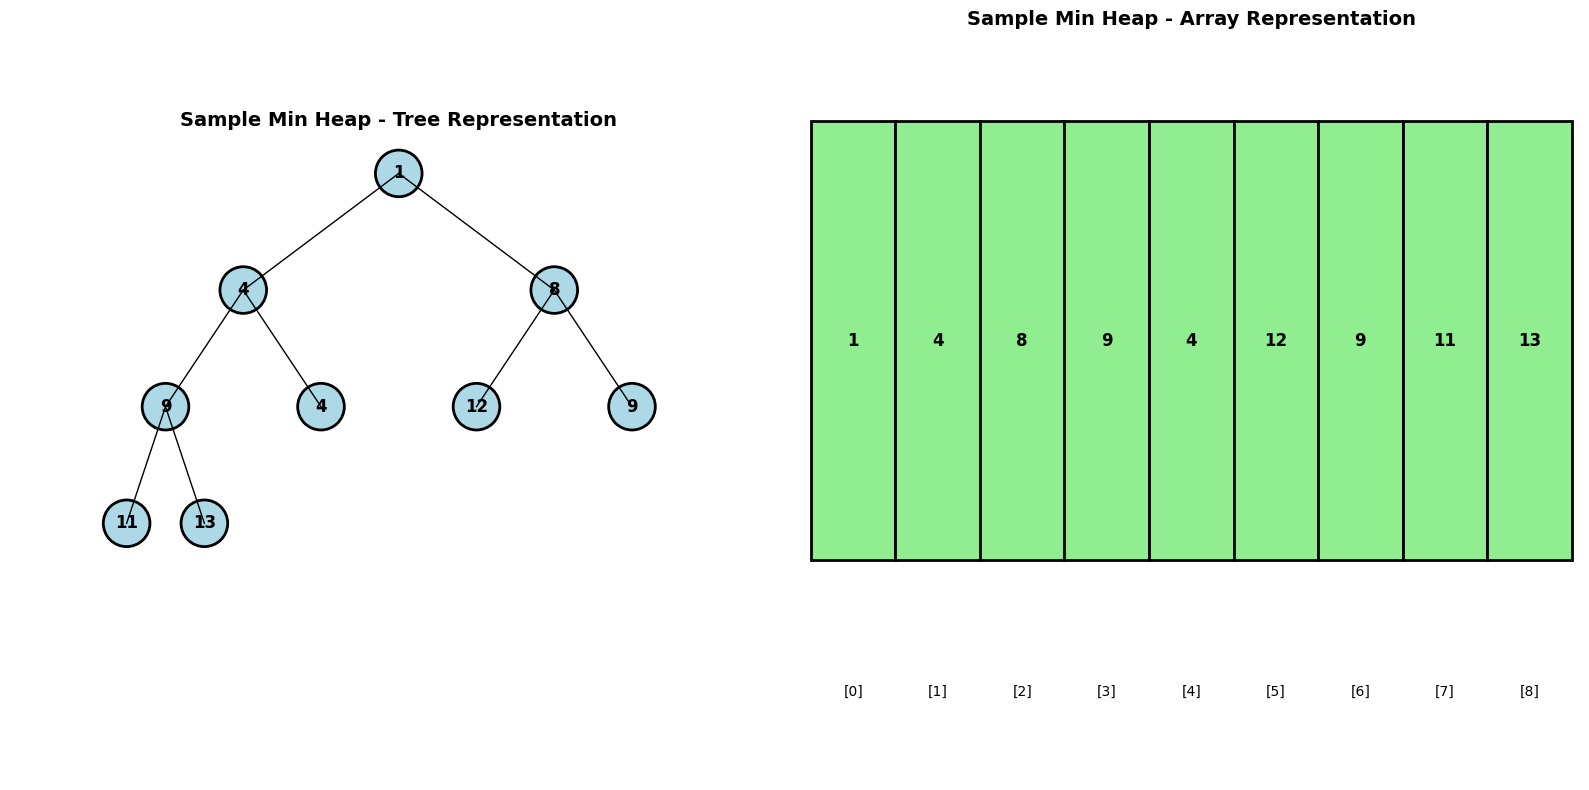


Parent-Child Relationships:
Index 0: Value=1
  Left Child: Index 1, Value=4
  Right Child: Index 2, Value=8

Index 1: Value=4
  Parent: Index 0, Value=1
  Left Child: Index 3, Value=9
  Right Child: Index 4, Value=4

Index 2: Value=8
  Parent: Index 0, Value=1
  Left Child: Index 5, Value=12
  Right Child: Index 6, Value=9

Index 3: Value=9
  Parent: Index 1, Value=4
  Left Child: Index 7, Value=11
  Right Child: Index 8, Value=13

Index 4: Value=4
  Parent: Index 1, Value=4

Index 5: Value=12
  Parent: Index 2, Value=8

Index 6: Value=9
  Parent: Index 2, Value=8

Index 7: Value=11
  Parent: Index 3, Value=9

Index 8: Value=13
  Parent: Index 3, Value=9



In [7]:
def visualize_heap(heap_array, title="Min Heap Visualization"):
    """Visualize min heap as both tree and array representation"""
    if not heap_array:
        print("Empty heap")
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Tree visualization
    n = len(heap_array)
    levels = int(np.log2(n)) + 1
    
    # Calculate positions for tree nodes
    positions = {}
    level_width = 2 ** (levels - 1)
    
    for i in range(n):
        level = int(np.log2(i + 1))
        pos_in_level = i - (2 ** level - 1)
        x = (pos_in_level + 0.5) * (level_width / (2 ** level)) - level_width / 2
        y = -(level * 1.5)
        positions[i] = (x, y)
    
    # Draw tree
    ax1.set_xlim(-level_width/2 - 1, level_width/2 + 1)
    ax1.set_ylim(-levels * 1.5 - 0.5, 0.5)
    
    # Draw edges first
    for i in range(n):
        if 2*i + 1 < n:  # Left child exists
            x1, y1 = positions[i]
            x2, y2 = positions[2*i + 1]
            ax1.plot([x1, x2], [y1, y2], 'k-', linewidth=1)
        if 2*i + 2 < n:  # Right child exists
            x1, y1 = positions[i]
            x2, y2 = positions[2*i + 2]
            ax1.plot([x1, x2], [y1, y2], 'k-', linewidth=1)
    
    # Draw nodes
    for i in range(n):
        x, y = positions[i]
        circle = plt.Circle((x, y), 0.3, color='lightblue', ec='black', linewidth=2)
        ax1.add_patch(circle)
        ax1.text(x, y, str(heap_array[i]), ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax1.set_title(f"{title} - Tree Representation", fontsize=14, fontweight='bold')
    ax1.set_aspect('equal')
    ax1.axis('off')
    
    # Array visualization
    for i, val in enumerate(heap_array):
        rect = plt.Rectangle((i, 0), 1, 1, facecolor='lightgreen', edgecolor='black', linewidth=2)
        ax2.add_patch(rect)
        ax2.text(i + 0.5, 0.5, str(val), ha='center', va='center', fontsize=12, fontweight='bold')
        ax2.text(i + 0.5, -0.3, f'[{i}]', ha='center', va='center', fontsize=10)
    
    ax2.set_xlim(-0.1, len(heap_array) + 0.1)
    ax2.set_ylim(-0.5, 1.2)
    ax2.set_title(f"{title} - Array Representation", fontsize=14, fontweight='bold')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Create a sample heap for visualization
sample_heap = MinHeap()
sample_data = [1, 4, 8, 9, 4, 12, 9, 11, 13]
sample_heap.heapify(sample_data)

print("=== Heap Visualization ===")
print(f"Heap array: {sample_heap.heap}")
visualize_heap(sample_heap.heap, "Sample Min Heap")

# Show parent-child relationships
print("\nParent-Child Relationships:")
for i in range(len(sample_heap.heap)):
    value = sample_heap.heap[i]
    parent_idx = sample_heap.parent(i) if sample_heap.has_parent(i) else None
    left_idx = sample_heap.left_child(i) if sample_heap.has_left_child(i) else None
    right_idx = sample_heap.right_child(i) if sample_heap.has_right_child(i) else None
    
    print(f"Index {i}: Value={value}")
    if parent_idx is not None:
        print(f"  Parent: Index {parent_idx}, Value={sample_heap.heap[parent_idx]}")
    if left_idx is not None:
        print(f"  Left Child: Index {left_idx}, Value={sample_heap.heap[left_idx]}")
    if right_idx is not None:
        print(f"  Right Child: Index {right_idx}, Value={sample_heap.heap[right_idx]}")
    print()

## 8. Time Complexity Analysis

Let's analyze and demonstrate the time complexity of various min heap operations with performance comparisons.

## 9. Python's Built-in Heap (heapq)

Python provides a built-in heap implementation in the `heapq` module. Let's compare it with our custom implementation.

In [8]:
print("=== Python's heapq Module Demo ===")

# Using heapq with a list
heap_list = []

# Adding elements
elements = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
print("Adding elements using heapq:")
for elem in elements:
    heapq.heappush(heap_list, elem)
    print(f"Added {elem}: {heap_list}")

print(f"\nFinal heap: {heap_list}")

# Removing elements
print("\nExtracting elements using heapq:")
while heap_list:
    min_elem = heapq.heappop(heap_list)
    print(f"Extracted {min_elem}: {heap_list}")

# Heapify existing list
print("\n=== Heapify with heapq ===")
random_list = [20, 15, 8, 10, 5, 7, 6, 2, 9, 1]
print(f"Original list: {random_list}")

heapq.heapify(random_list)
print(f"After heapify: {random_list}")

# Useful heapq functions
print("\n=== Useful heapq Functions ===")

# Create a sample heap
sample_heap = [1, 4, 8, 9, 4, 12, 9, 11, 13]
heapq.heapify(sample_heap)

print(f"Sample heap: {sample_heap}")
print(f"Smallest element: {sample_heap[0]}")  # Peek without removing

# Get n smallest elements
data = [64, 34, 25, 12, 22, 11, 90, 88, 76, 50, 42]
print(f"\\nData: {data}")
print(f"3 smallest: {heapq.nsmallest(3, data)}")
print(f"3 largest: {heapq.nlargest(3, data)}")

# Performance comparison
print("\\n=== Performance Comparison: Custom vs heapq ===")
test_data = [random.randint(1, 1000) for _ in range(1000)]

# Custom heap
custom_heap = MinHeap()
start_time = time.time()
for x in test_data:
    custom_heap.insert(x)
custom_time = time.time() - start_time

# heapq
heapq_list = []
start_time = time.time()
for x in test_data:
    heapq.heappush(heapq_list, x)
heapq_time = time.time() - start_time

print(f"Custom heap time: {custom_time:.6f} seconds")
print(f"heapq time: {heapq_time:.6f} seconds")
print(f"heapq is {custom_time/heapq_time:.1f}x faster (optimized C implementation)")

=== Python's heapq Module Demo ===
Adding elements using heapq:
Added 4: [4]
Added 1: [1, 4]
Added 3: [1, 4, 3]
Added 2: [1, 2, 3, 4]
Added 16: [1, 2, 3, 4, 16]
Added 9: [1, 2, 3, 4, 16, 9]
Added 10: [1, 2, 3, 4, 16, 9, 10]
Added 14: [1, 2, 3, 4, 16, 9, 10, 14]
Added 8: [1, 2, 3, 4, 16, 9, 10, 14, 8]
Added 7: [1, 2, 3, 4, 7, 9, 10, 14, 8, 16]

Final heap: [1, 2, 3, 4, 7, 9, 10, 14, 8, 16]

Extracting elements using heapq:
Extracted 1: [2, 4, 3, 8, 7, 9, 10, 14, 16]
Extracted 2: [3, 4, 9, 8, 7, 16, 10, 14]
Extracted 3: [4, 7, 9, 8, 14, 16, 10]
Extracted 4: [7, 8, 9, 10, 14, 16]
Extracted 7: [8, 10, 9, 16, 14]
Extracted 8: [9, 10, 14, 16]
Extracted 9: [10, 16, 14]
Extracted 10: [14, 16]
Extracted 14: [16]
Extracted 16: []

=== Heapify with heapq ===
Original list: [20, 15, 8, 10, 5, 7, 6, 2, 9, 1]
After heapify: [1, 2, 6, 9, 5, 7, 8, 10, 20, 15]

=== Useful heapq Functions ===
Sample heap: [1, 4, 8, 9, 4, 12, 9, 11, 13]
Smallest element: 1
\nData: [64, 34, 25, 12, 22, 11, 90, 88, 76, 50,

## 10. Practical Applications and LeetCode Problems

Min heaps are essential for solving many algorithmic problems. Here are some common use cases and LeetCode problems.

In [9]:
print("=== Practical Applications of Min Heaps ===")

# 1. Priority Queue - Task Scheduling
class Task:
    def __init__(self, name, priority):
        self.name = name
        self.priority = priority
    
    def __lt__(self, other):
        return self.priority < other.priority
    
    def __repr__(self):
        return f"Task({self.name}, priority={self.priority})"

print("1. Priority Queue Example:")
task_queue = []
tasks = [
    Task("Email", 3),
    Task("Bug Fix", 1),  # Highest priority (lowest number)
    Task("Meeting", 2),
    Task("Documentation", 4)
]

for task in tasks:
    heapq.heappush(task_queue, task)
    print(f"Added: {task}")

print("\\nProcessing tasks by priority:")
while task_queue:
    task = heapq.heappop(task_queue)
    print(f"Processing: {task}")

# 2. Finding K Smallest Elements
print("\\n2. Find K Smallest Elements:")
numbers = [64, 34, 25, 12, 22, 11, 90, 88, 76, 50, 42]
k = 3
print(f"Numbers: {numbers}")
print(f"3 smallest: {heapq.nsmallest(k, numbers)}")

# 3. Merge K Sorted Lists (simplified version)
print("\\n3. Merge Sorted Lists:")
def merge_sorted_lists(lists):
    """Merge multiple sorted lists using min heap"""
    heap = []
    result = []
    
    # Add first element from each list to heap
    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))  # (value, list_index, element_index)
    
    while heap:
        value, list_idx, elem_idx = heapq.heappop(heap)
        result.append(value)
        
        # Add next element from the same list
        if elem_idx + 1 < len(lists[list_idx]):
            next_value = lists[list_idx][elem_idx + 1]
            heapq.heappush(heap, (next_value, list_idx, elem_idx + 1))
    
    return result

# Example
sorted_lists = [
    [1, 4, 5],
    [1, 3, 4],
    [2, 6]
]
print(f"Input lists: {sorted_lists}")
merged = merge_sorted_lists(sorted_lists)
print(f"Merged result: {merged}")

# 4. Running Median
print("\\n4. Running Median using Two Heaps:")
class MedianFinder:
    def __init__(self):
        self.small = []  # max heap (negate values for min heap)
        self.large = []  # min heap
    
    def addNum(self, num):
        # Add to small heap first
        heapq.heappush(self.small, -num)
        
        # Move largest from small to large
        if self.small and self.large and (-self.small[0] > self.large[0]):
            val = -heapq.heappop(self.small)
            heapq.heappush(self.large, val)
        
        # Balance heaps
        if len(self.small) > len(self.large) + 1:
            val = -heapq.heappop(self.small)
            heapq.heappush(self.large, val)
        if len(self.large) > len(self.small) + 1:
            val = heapq.heappop(self.large)
            heapq.heappush(self.small, -val)
    
    def findMedian(self):
        if len(self.small) > len(self.large):
            return -self.small[0]
        elif len(self.large) > len(self.small):
            return self.large[0]
        else:
            return (-self.small[0] + self.large[0]) / 2

# Demo running median
median_finder = MedianFinder()
stream = [5, 15, 1, 3]
print("Adding numbers and finding running median:")
for num in stream:
    median_finder.addNum(num)
    print(f"Added {num}, Median: {median_finder.findMedian()}")

print("\\n=== Common LeetCode Problems Using Min Heaps ===")
leetcode_problems = [
    "703. Kth Largest Element in a Stream",
    "215. Kth Largest Element in an Array", 
    "23. Merge k Sorted Lists",
    "295. Find Median from Data Stream",
    "347. Top K Frequent Elements",
    "378. Kth Smallest Element in a Sorted Matrix",
    "451. Sort Characters By Frequency",
    "692. Top K Frequent Words",
    "973. K Closest Points to Origin",
    "1167. Minimum Cost to Connect Sticks"
]

for i, problem in enumerate(leetcode_problems, 1):
    print(f"{i:2d}. {problem}")

print("\\n=== When to Use Min Heap ===")
use_cases = [
    "Finding minimum elements efficiently",
    "Priority queue implementations", 
    "Merge operations on sorted data",
    "Finding K smallest/largest elements",
    "Median finding algorithms",
    "Dijkstra's shortest path algorithm",
    "Huffman coding for compression",
    "Job scheduling systems"
]

for i, use_case in enumerate(use_cases, 1):
    print(f"{i}. {use_case}")

=== Practical Applications of Min Heaps ===
1. Priority Queue Example:
Added: Task(Email, priority=3)
Added: Task(Bug Fix, priority=1)
Added: Task(Meeting, priority=2)
Added: Task(Documentation, priority=4)
\nProcessing tasks by priority:
Processing: Task(Bug Fix, priority=1)
Processing: Task(Meeting, priority=2)
Processing: Task(Email, priority=3)
Processing: Task(Documentation, priority=4)
\n2. Find K Smallest Elements:
Numbers: [64, 34, 25, 12, 22, 11, 90, 88, 76, 50, 42]
3 smallest: [11, 12, 22]
\n3. Merge Sorted Lists:
Input lists: [[1, 4, 5], [1, 3, 4], [2, 6]]
Merged result: [1, 1, 2, 3, 4, 4, 5, 6]
\n4. Running Median using Two Heaps:
Adding numbers and finding running median:
Added 5, Median: 5
Added 15, Median: 10.0
Added 1, Median: 5
Added 3, Median: 4.0
\n=== Common LeetCode Problems Using Min Heaps ===
 1. 703. Kth Largest Element in a Stream
 2. 215. Kth Largest Element in an Array
 3. 23. Merge k Sorted Lists
 4. 295. Find Median from Data Stream
 5. 347. Top K Frequent 

## Summary

Congratulations! You've completed a comprehensive tutorial on Min Heaps. Here's what we covered:

### Key Takeaways:

1. **Min Heap Properties**: Complete binary tree with parent ≤ children property
2. **Efficient Operations**: Insert O(log n), Extract-min O(log n), Peek O(1)
3. **Array Implementation**: Easy to implement using array with index relationships
4. **Heapify**: Build heap from array in O(n) time
5. **Python's heapq**: Optimized built-in implementation
6. **Applications**: Priority queues, finding K elements, merge operations, and many LeetCode problems

### Next Steps:
- Practice implementing heap-based solutions for LeetCode problems
- Explore max heaps (similar concept, but largest element at root)
- Study advanced heap variants (binary heap, Fibonacci heap, etc.)
- Apply heaps to graph algorithms like Dijkstra's algorithm

### Resources:
- [Python heapq documentation](https://docs.python.org/3/library/heapq.html)
- [LeetCode Heap problems](https://leetcode.com/tag/heap/)
- [Heap visualization tools](https://visualgo.net/en/heap)

Happy coding! 🚀